# Assignment 2: Due Tuesday 9/19

## 2D Projectile Motion with Quadratic Drag 

Quadratic drag term is given by $\vec{f}_{drag} = -cv\vec{v}$. This leads to equations of motion in the horizontal ($x$) and vertical ($y$) directions given by 

* $m v_{x}' = -\left(c\sqrt{v^2_x +v^2_y}\right)v_x$

* $m v_{y}' = - mg - \left(c\sqrt{v^2x + v^2_y}) \right)v_y$

* $x' = v_x$

* $y' = v_y$

,where $'$ is a time derivative.

You can read more about drag forces here: https://openstax.org/books/university-physics-volume-1/pages/6-4-drag-force-and-terminal-speed

## Problem

To get an accurate trajectory for a projectile one must often take account of several complications. For example, if a projectile goes very high then we have to allow for the reduction in air resistance as atmospheric density decreases. To illustrate this, consider an iron cannonball (diameter, $D = 15\;cm$, density $\rho = 7.8\;g/cm^3$) that is fired with initial velocity $300 m/s$ at 50 degrees above the horizontal. The drag force is approximately quadratic, but since the drag is proportional to the atmospheric density and the density falls off exponentially with height, the drag force is $f = c(y) v^2$ where $c(y) = \gamma D^2 exp(-y/\lambda)$ with $\gamma$ given as $0.25\;N\cdot s^2/m^4$ and $\lambda = 10,000\;m$. 

# Part a)

Ignoring air resistance completely, write down the equations of motion for the cannonball (use the markup feature in Jupyter notbook and latex (https://en.wikibooks.org/wiki/LaTeX/Mathematics)). Your answer should depend on only $v_x, v_y,$ and $g$ 

Equations with no air resistance ($c = 0$):

* $v_x' = 0$

* $x' = v_x$

* $v_y' = g$

* $y' = v_y$

Code the equations into a function 

In [1]:
#define projectile motion function in vaccum
#def proj_vac

import scipy as sp
import math as mt
import numpy as np
import matplotlib.pyplot as plt

g = -9.8 # m/s^2
D = .15 # m
rho = 7.8E3 # g/m^3
gamma = 0.25 # N * s^2/m^4
ld = 10000 # m

def proj_vac(t, state):
    
    x_dot = state[2]
    y_dot = state[3]
    
    x_ddot = 0
    y_ddot = g
    
    
    return np.array([x_dot, y_dot, x_ddot, y_ddot])


v_x0 = 300 * mt.cos(50*mt.pi/180)
v_y0 = 300 * mt.sin(50*mt.pi/180)
x_0 = 0
y_0 = 0

t = np.linspace(0, 50, 1000)
state = np.array([x_0, y_0, v_x0, v_y0])

Using Scipy (*RK4(5)* method) solve numerically $x(t)$ and $y(t)$ for $0 \le t \le 50\;s$

Plot the ball's trajectory (vertical vs. horizontal positions) and find it's horizontal range. At what time does the ball hit the ground?

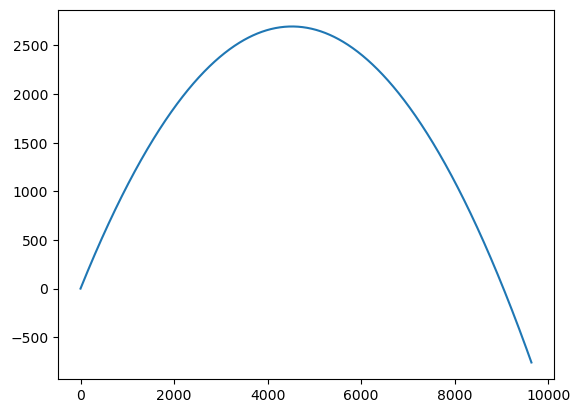

In [18]:
#codes
fig, ax = plt.subplots()
ax.plot(values.y[0], values.y[1])
plt.show()

# Part b)

Write your own Runge-Kutta order 4 function and use it to solve Part a) [Meaning do not use Scipy for this part].

In [16]:
#codes
def myRK45(func, t, state, t_eval):
    
    x_0 = state[0]
    y_0 = state[1]
    
    iv = (t[1] - t[0])/len(t_eval)    
    for i in range(len(t_eval)-1):
        ti = t_eval[i]
        tf = t_eval[i+1]
        
        


    return None

myRK45(proj_vac, (0, 50), state, t)

0.05


How does your Runge-Kutta 4th order evaluation compare to Scipy's *RK4(5)* method?

# Part c)

Now include air resistance, but ignore the variation of atmospheric pressure [that is  treat $c(y)$ as a constant  that does not change with position, where $c = \gamma D^2$].

Write down the equations of motion (use the markup feature in Jupyter notbook and latex). Your answers should depend only on $c, m, v, v_x, v_y,$ and $g$.

Equations with no air resistance ($c = const$):

* $v_x' =  -\frac{\left(cv \right)v_x}{m}$

* $x' = v_x$

* $v_y' = - g - \frac{\left(cv\right)v_y}{m}$

* $y' = v_y$

Code the equations into a function

In [5]:
#code

c = (gamma * D**2)
m = rho * 1.33*mt.pi*((0.5*D)**3)

def const_drag(t, state):
    
    x_dot = state[2]
    y_dot = state[3]
    
    v = mt.sqrt(x_dot**2 + y_dot**2)
    
    x_ddot = -(c*v*x_dot/m)
    drag = -(c*v*y_dot/m)
    y_ddot = -(g + (c*v*y_dot/m))
    #print([v, y_ddot, drag])
    
    return np.array([x_dot, y_dot, x_ddot, y_ddot])

Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 35\;s$

In [6]:
#codes
t2 = np.linspace(0, 35, 1000)
cdvalues = sp.integrate.solve_ivp(const_drag, (0, 35), state, method='RK45', t_eval=t2)

Plot the ball's trajecory and find it's horizontal range. At what time does the ball hit the ground?

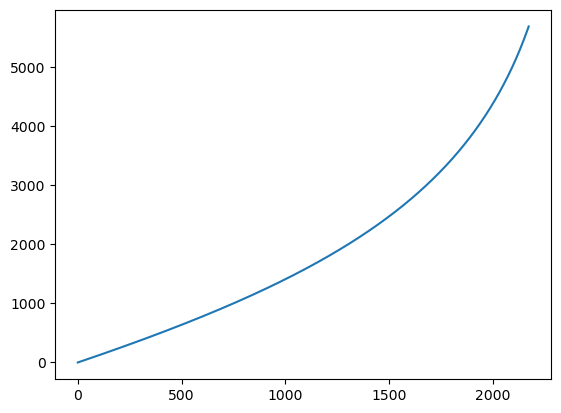

In [7]:
#codes
fig, ax = plt.subplots()
ax.plot(cdvalues.y[0], cdvalues.y[1])
plt.show()

# Part d)

Now include the drag term with the atmospheric variation included [meaning $c(y) = \gamma D^2exp(-y/\lambda)$]

Write down the equations of motion (use the markup feature in Jupyter notbook and latex). For this part write out explicitly what $c$ is in your equations, e.g. $a*c = a* \gamma D^2exp(-y/\lambda)$. Your equations should depend only on $\gamma, \lambda, y, D, v, v_x, v_y, m,$ and $g$.

Equations with no air resistance ($c = \gamma D^2exp(-y/\lambda)$):

* $v_x' = -(\gamma D^2exp(-y/\lambda))vv_x$

* $x' = $

* $v_y' = $

* $y' = $

Code the equations into a function

In [8]:
#code
def atmo_var(t, state):
    
    x = state[0]
    y = state[1]
    
    x_dot = state[2]
    y_dot = state[3]
    
    v = mt.sqrt(x_dot**2 + y_dot**2)
    c = (gamma*(D**2)*mt.e**(-y/ld))
    
    x_ddot = -c*v*x_dot/m
    y_ddot = g - c*v*y_dot/m
    
    
    return np.array([x_dot, y_dot, x_ddot, y_ddot])


m = rho * 1.33*mt.pi*((0.5*D)**3)

Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 35\;s$

In [9]:
#codes
t3 = np.linspace(0, 35, 1000)
avvalues = sp.integrate.solve_ivp(atmo_var, (0, 35), state, method='RK45', t_eval=t3)

Plot the ball's trajectory and find it's horizontal range. At what time does it hit the ground?

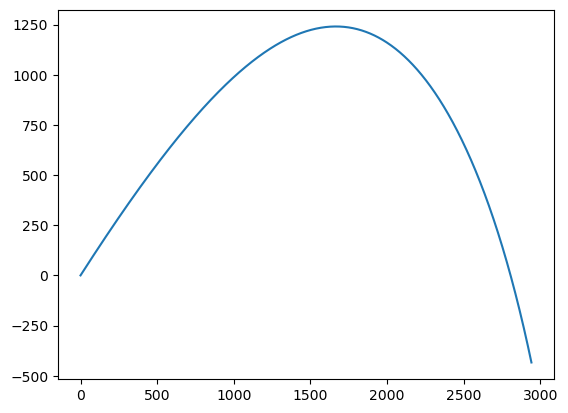

In [10]:
#codes
fig, ax = plt.subplots()
ax.plot(avvalues.y[0], avvalues.y[1])
plt.show()

# Part e)

Plot the trajectories from parts a), c), and d) on the same plot.

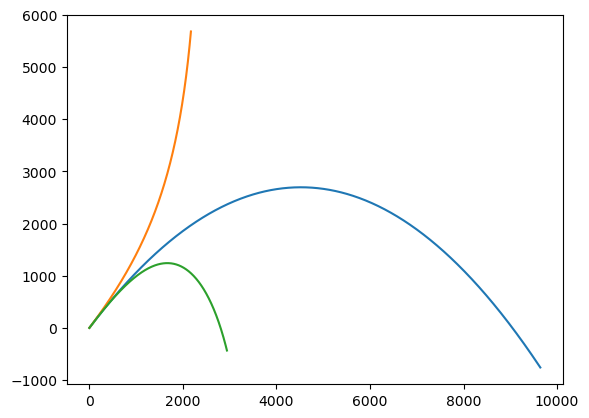

In [11]:
#codes
fig, ax = plt.subplots()
ax.plot(values.y[0], values.y[1])
ax.plot(cdvalues.y[0], cdvalues.y[1])
ax.plot(avvalues.y[0], avvalues.y[1])
plt.show()

Your results should look like the plot below.

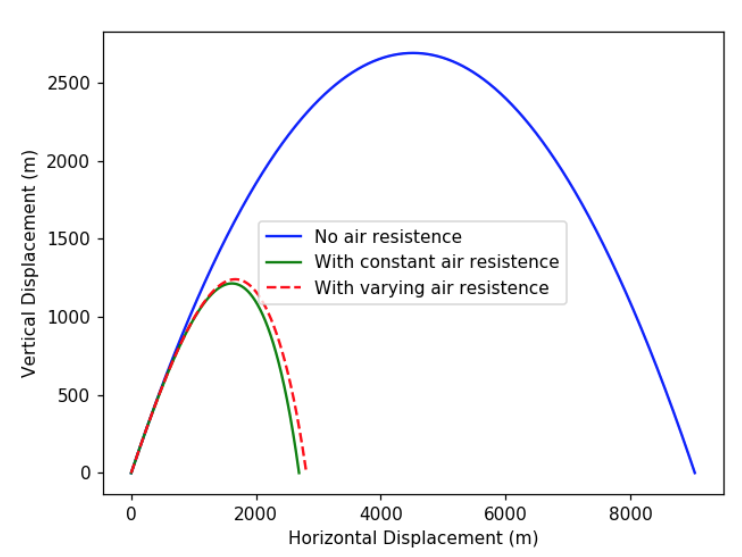

**What impacts the motion more: turning on air resistance (i.e with $c(0)$) or turning on the variation with atmosphere (i.e. $c(y)$) ?**

In [12]:
turning air resistance on

SyntaxError: invalid syntax (3434775472.py, line 1)